In [438]:
import numpy as np
import pandas as pd

In [439]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4740,ham,Many more happy returns of the day. I wish you...,NaN,NaN,NaN
4146,ham,Pls help me tell sura that i'm expecting a bat...,NaN,NaN,NaN
4737,ham,I bought the test yesterday. Its something tha...,NaN,NaN,NaN
901,ham,How is it possible to teach you. And where.,NaN,NaN,NaN
1145,spam,"Thank you, winner notified by sms. Good Luck! ...",NaN,NaN,NaN


In [440]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Bulding
5. Evaluation
6. Improvement

## Data Cleaning

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [442]:
from sklearn.preprocessing import LabelEncoder
enc =  LabelEncoder()

df.head()

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df['label'] = enc.fit_transform(df['label'])


In [443]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [444]:
# missing Values
df.isnull().sum()

label      0
message    0
dtype: int64

In [445]:
# Duplicate values
df.duplicated().sum()

403

In [446]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [447]:
df.shape

(5169, 2)

## EDA


In [448]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

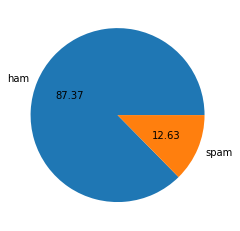

In [449]:
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Data is imbalanced

In [450]:
import nltk

In [451]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Raj
[nltk_data]     Bhuva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [452]:
# number of characters
df['num_characters'] = df['message'].apply(len)
df.sample(5)

,label,message,num_characters
3676,0,Great! So what attracts you to the brothas?,43
812,1,Congratulations ur awarded either å£500 of CD ...,150
914,0,"Call me da, i am waiting for your call.",39
1394,0,R we still meeting 4 dinner tonight?,36
2582,1,3 FREE TAROT TEXTS! Find out about your love l...,131


In [453]:
# number of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,label,message,num_characters,num_words
4779,0,Sen told that he is going to join his uncle fi...,58,13
3114,0,I wait 4 Ì_ inside da car park...,33,9
4178,0,Can Ì_ send me a copy of da report?,35,10
3742,0,"Nah, Wednesday. When should I bring the mini c...",62,14
3549,0,Dad wanted to talk about the apartment so I go...,69,16


In [454]:
# number of sentences
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,label,message,num_characters,num_words,num_sentences
1288,0,Happy new year to u too!,24,7,1
4203,0,How are you enjoying this semester? Take care ...,54,11,2
1658,1,RGENT! This is the 2nd attempt to contact U!U ...,148,30,5
2556,0,Fuck babe ... What happened to you ? How come ...,66,15,2
1553,0,Ok how you dear. Did you call chechi,36,9,2


In [455]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [456]:
# ham
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [457]:
# spam
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [458]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

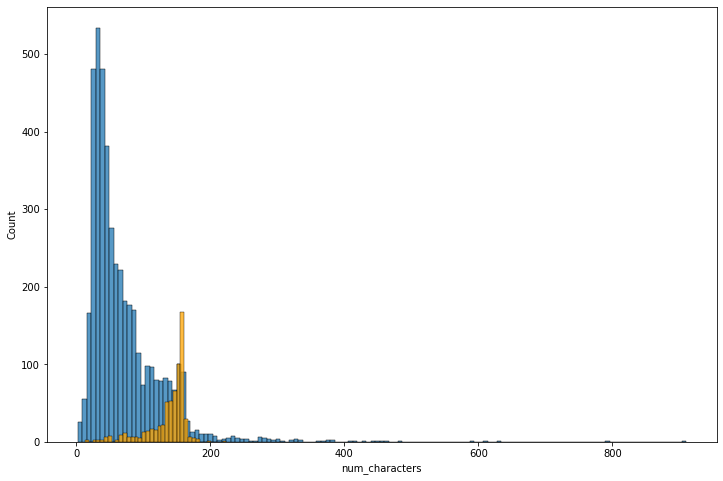

In [459]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'], color='orange')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

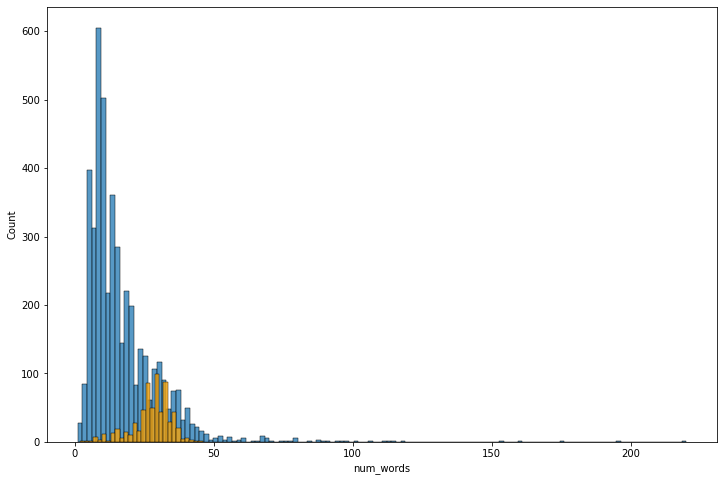

In [460]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color='orange')

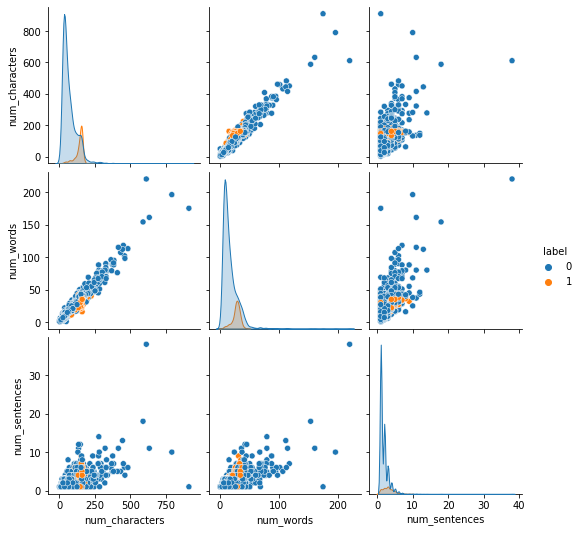

In [461]:
sns.pairplot(df, hue='label')

<AxesSubplot:>

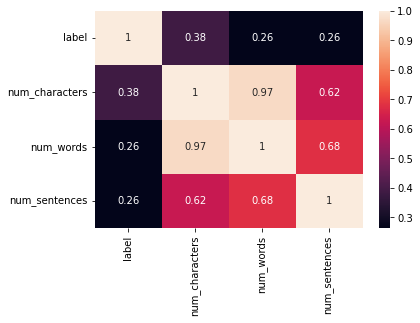

In [462]:
sns.heatmap(df.corr(), annot=True)

## Data Preprocessing

In [463]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    y = ' '.join(y)
    
    return y

In [464]:
transform_text(df['message'][5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [465]:
df['transformed_message'] = df['message'].apply(transform_text)
df.sample(5)

,label,message,num_characters,num_words,num_sentences,transformed_message
4677,0,It is a good thing I'm now getting the connect...,55,13,1,good thing get connect bw
4871,0,Hi dis is yijue i would be happy to work wif Ì...,66,16,1,hi di yiju would happi work wif gek1510
400,1,FREE RINGTONE text FIRST to 87131 for a poly o...,158,35,3,free rington text first 87131 poli text get 87...
1405,0,K..k..any special today?,24,8,1,k k special today
5411,0,I ask if u meeting da ge tmr nite...,36,10,1,ask u meet da ge tmr nite


In [466]:
from wordcloud import WordCloud

wc = WordCloud(width=1024, height=1024, min_font_size=10, background_color='black')


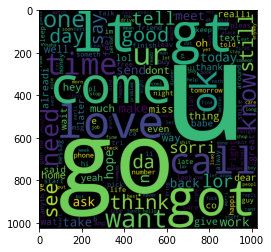

In [467]:
spam_wc = wc.generate(df[df['label'] == 0]['transformed_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

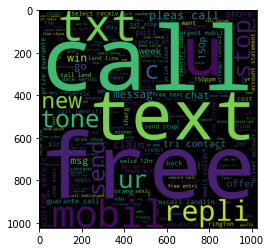

In [468]:
ham_wc = wc.generate(df[df['label'] == 1]['transformed_message'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [469]:
spam_corpus = []

for msg in df[df['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

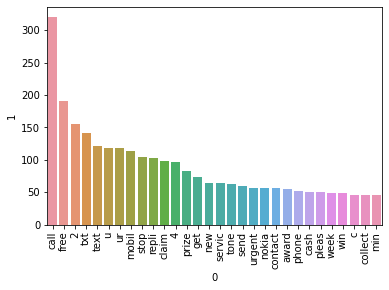

In [470]:
from collections import Counter

x = Counter(spam_corpus).most_common(30)
x = pd.DataFrame(x)

sns.barplot(data=x, x= 0, y= 1)
plt.xticks(rotation='vertical')
plt.show()

In [471]:
spam_corpus = []

for msg in df[df['label'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

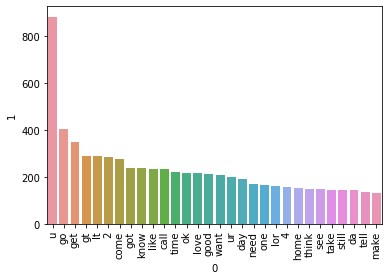

In [472]:
from collections import Counter

x = Counter(spam_corpus).most_common(30)
x = pd.DataFrame(x)

sns.barplot(data=x, x= 0, y= 1)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [473]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [474]:
X = tfidf.fit_transform(df['transformed_message']).toarray()
X.shape

(5169, 3000)

In [475]:
y = df['label'].values

In [476]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [477]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [478]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [479]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [480]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [481]:
# we use tfidf -> MNB

## Improvement


In [482]:
# # yet to see
# https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbVpxdDNiQlZHZzNMSms0NlV6YmJqLUtTMVNVd3xBQ3Jtc0tuM3BYVWIyTWk4VTRCSFN6MDA2YWYxMlZhY2dPai1ZamZleHBFOU96bzBmcFRQTG1RbHdKZ0hSXzExRVUtYWdoa2hKTFFwTVdxSWtjNmduT2tkWG5MMlp2YnJVaHVoV2htWXpfajBHdERJcmptc0dpOA&q=https%3A%2F%2Fgithub.com%2Fcampusx-official%2Fsms-spam-classifier&v=YncZ0WwxyzU

In [484]:
import pickle 

pickle.dump(tfidf,open('vectroizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))